# TRAINING MODELS TO CLASSIFICATION
#### Johany A. Carmona C.
###### email: johany.carmona@tuta.io; johany.carmona@udea.edu.co

<h1 align="center"><font size="5">Classification with Python</font></h1>

Implementation to generate a model to predict the reliability of a loan to a customer using Statistical and Machine Learning classification techniques with Python, such as K Nearest Neighbor(KNN), Decision Tree, Support Vector Machine (SVM) and Logistic Regression. The bests weight parameters will be found according influence of Customer Loan Phenomenon.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-09-12 02:00:26--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2019-09-12 02:00:27 (12.6 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

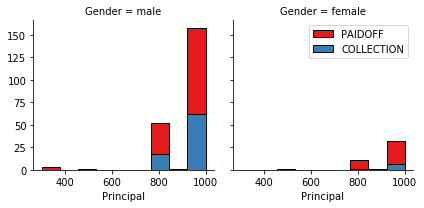

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

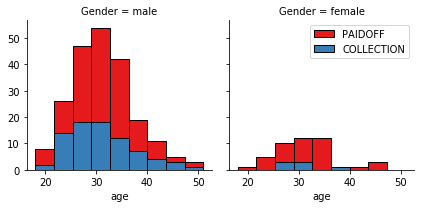

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

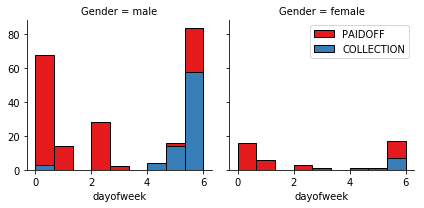

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, we will use the training set to build an accurate model. Then use the test set to report the accuracy of the model using the following algorithms:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- We will go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- We will use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.

Notice: To get better the score of the model you should find all possible combinations without repetition to all of labels of the Data. Such as: 'Principal', 'terms', 'age', 'Gender', 'dayofweek', 'weekend', 'Bechalor', 'High School or Below', 'college'. For 'L' number of labels, exists $2^{L}-1$ possible combinations without repetition.
For example: For the labels 'Principal', 'terms', 'age', exists 7 possible combinations without repetition such as:
###### [['Principal'],['terms'],['age'],['Principal','terms'],['Principal','age'],['terms','age'],['Principal','terms','age']]

Now, we'll create the functions that make it. In our case, we are going to use 9 labels of our data, then it will make 511 possible combinations or iterations for our training model.

In [20]:
import numpy as np

def combination(mix, scheme):
    new_comb=[]
    vector=[]
    for i in range(len(scheme)):
        vector.append(str(i))
    for x in mix:
        pto=scheme.index(x[len(x)-1])
        for j in range(pto,len(scheme)):
            if scheme[j] not in x and scheme[len(scheme)-1] not in x:
                vector.append(str(x+scheme[j]))
    return vector
 
def vector_label_combinations(labels):
    vector_label=[]
    for i in range(labels):
        vector_label.append(str(i))
    j=0
    out=vector_label
    for i in range(labels-1):
        out=combination(out,vector_label)
    vector_label=out
    return vector_label

def frame_vector_label(vector_label):
    frame_vector_label=[]
    iterations=len(vector_label)
    for i in range(iterations):
        label=[]
        len_label=len(str(vector_label[i]))
        for j in range(len_label):
            label.append(str(vector_label[i])[j])
        frame_vector_label.append(label)
    return frame_vector_label
  
def set_labels_vector(frame_vector_label,Feature):
    set_labels_vector=[]
    L=len(Feature.columns)
    iterations=2**L-1
    for i in range(iterations-1,-1,-1):
        set_labels=[]
        n_labels=len(frame_vector_label[i])
        for j in range(n_labels):
            set_labels.append(str(Feature.columns[int(frame_vector_label[i][j])]))
        set_labels_vector.append(set_labels)
    return set_labels_vector

def adjust_Feature(set_labels,Feature):
    Feature = Feature[set_labels]
    return Feature

def adjust_labels(set_labels,Feature):
    Feature = Feature[set_labels]
    return Feature.values

def columns(set_labels,Feature):
    Feature = Feature[set_labels]
    return Feature.columns[0:len(set_labels)]


We are going to create and transform the Data for the next steps.

In [21]:
#Use one hot encoding technique to conver categorical varables to binary variables
Feature = df[['Principal','terms','age','Gender','dayofweek','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,dayofweek,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,3,0,0,1,0
1,1000,30,33,1,3,0,1,0,0
2,1000,15,27,0,3,0,0,0,1
3,1000,30,28,1,4,1,0,0,1
4,1000,30,29,0,4,1,0,0,1


Look at all of possible combinations for our data with 9 labels.

In [22]:
model_parameters=[] #The best parameters found in the training to each model/algorithm
##Finding all possible combinations for all of labels without repetition in the Data
L=len(Feature.columns)
iterations=2**L-1
vector_label=vector_label_combinations(L)
frame_vector_label_=frame_vector_label(vector_label)
set_labels_vector_=set_labels_vector(frame_vector_label_,Feature)
table_combinations=pd.DataFrame(set_labels_vector_)
head_columns=[]
for i in range(L):
    head_columns.append(('Label '+str(i)))
table_combinations.columns=head_columns
#View of the latest 31 possible combinations for the labels
table_combinations.head(31)

,Label 0,Label 1,Label 2,Label 3,Label 4,Label 5,Label 6,Label 7,Label 8
0,Principal,terms,age,Gender,dayofweek,weekend,Bechalor,High School or Below,college
1,terms,age,Gender,dayofweek,weekend,Bechalor,High School or Below,college,None
2,Principal,age,Gender,dayofweek,weekend,Bechalor,High School or Below,college,None
3,Principal,terms,Gender,dayofweek,weekend,Bechalor,High School or Below,college,None
4,Principal,terms,age,dayofweek,weekend,Bechalor,High School or Below,college,None
5,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college,None
6,Principal,terms,age,Gender,dayofweek,Bechalor,High School or Below,college,None
7,Principal,terms,age,Gender,dayofweek,weekend,High School or Below,college,None
8,Principal,terms,age,Gender,dayofweek,weekend,Bechalor,college,None
9,Principal,terms,age,Gender,dayofweek,weekend,Bechalor,High School or Below,None


# About the Variations of the Parameters


Also, we make this model varying each one parameter settings until we get the best Score.

# K Nearest Neighbor(KNN)
Notice: We will find the best __k__  and the best __test_size__ to build the model with the best accuracy. 

In [23]:
##Import Library
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
import time
import warnings
warnings.filterwarnings("ignore")

k_label_i=[] #The best K value of model for each label.
test_size_label_i=[] #Test train used for i label.
A_train_label_i=[] #Accuracy vector of train for each label.
A_test_label_i=[] #Accuracy vector of test for each label.
F_test_label_i=[] #F1-Score Accuracy vector of test for each label.
J_test_label_i=[] #Jaccard Index Accuracy vector of test for each label.

runclock=time.time()

##Set Config
timep=0.1 #Time of processing to find the best k value for each test_size value.
deepening=3 #Number of additional steps to finish the bucle.
Accuracy=0.99 #Set the desired accuracy
test_size_min=0.20 #Initial train_size
test_size_max=0.21 #Final train_size
delta_test_size=0.01 #Delta difference between steps

for m in range(iterations):
    #Feature selection
    X = adjust_labels(set_labels_vector_[m],Feature)
    y = df['loan_status'].values
    #Normalize Data
    X= preprocessing.StandardScaler().fit(X).transform(X)
    X[0:5]
    #Adjusting
    steps=int((test_size_max-test_size_min)/delta_test_size)+1
    k_i=[] #K value of model for each 'test_size' value
    test_size_i=[] #Test train used for i step
    A_train_i=[] #Accuracy vector of train for each test_size value.
    A_test_i=[] #Accuracy vector of test for each test_size value.
    F_test_i=[] #F1-ScoreAccuracy vector of test for each test_size value.
    J_test_i=[] #Jaccard Index Accuracy vector of test for each test_size value.
    J=0 #step that maximizes the accurazy of the model
    for j in range(0,steps):
        test_size_=test_size_min+j*delta_test_size
        #TRAIN TEST SPLIT
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=test_size_, random_state=4)
        ###CLASSIFICATION
        ##Parameters
        A_train=[] #Accuracy of train for each k value
        A_test=[] #Accuracy of test for each k value
        F_test=[] # F1-Score Accuracy of test for each k value
        J_test=[] #Jaccard Index Accuracy of test for each k value
        
        timei=time.time() #Initial time
        i=0
        clock=0 #Clock
        k=0
        while i==0 or i>0 and clock<timep and max(A_test)<Accuracy and i-A_test.index(max(A_test))<deepening:
            #Training
            clock=time.time()-timei
            i=i+1
            ##Train Model and Predict  
            neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
            neigh
            ##Predicting
            yhat = neigh.predict(X_test)
            yhat[0:5]
            ##Accuracy evaluation
            A_train.append(metrics.accuracy_score(y_train, neigh.predict(X_train)))
            A_test.append(metrics.accuracy_score(y_test, yhat))
            F_test.append(f1_score(y_test, yhat, average='weighted'))
            J_test.append(jaccard_similarity_score(y_test, yhat))
        k=A_test.index(max(A_test))+1
        k_i.append(k)
        test_size_i.append(test_size_)
        A_train_i.append(A_train[k-1])
        A_test_i.append(A_test[k-1])
        F_test_i.append(F_test[k-1])
        J_test_i.append(J_test[k-1])
    J=A_test_i.index(max(A_test_i))
    test_size_label_i.append(test_size_i[J])
    k_label_i.append(k_i[J])
    A_train_label_i.append(A_train_i[J])
    A_test_label_i.append(A_test_i[J])
    F_test_label_i.append(F_test_i[J])
    J_test_label_i.append(J_test_i[J])
    print("-------------------------------------")
    print("TRAINING MODEL")
    print("<<Status: {0:.2%}>>".format(m/iterations))
    if(len(A_test_label_i)==0):
        print("Max Model Accuracy: 0.0000")
    if(len(A_test_label_i)>0):
        print("Max Model Accuracy: %.4f"%(A_test_label_i[A_test_label_i.index(max(A_test_label_i))]))
    print("Runtime: %.2f minutes"%((time.time()-runclock)/60))
    if(m>0):
        print("Time Remaining: %.2f minutes"%((iterations-m)*(time.time()-runclock)/(60*m)))
    print("\nLabels: ",set_labels_vector_[m])
    print("test_size_i: ",test_size_i[J])
    print("k_i: ", k_i[J])
    print("\nTrain Set Accuracy i: ", A_train_i[J])
    print("Test Set Accuracy i: ", A_test_i[J])
    print("F1 Score i: ", F_test_i[J])
    print("Jaccard Score i: ", J_test_i[J])
H=A_test_label_i.index(max(A_test_label_i))
print("--------------------------------------------------------------------------")
print("OPTIMIZED PARAMETERS")
print("<<Status: {0:.2%}>>".format(1))
print("Max Model Accuracy: %.4f"%(A_test_label_i[H]))
print("Runtime: %.2f minutes"%((time.time()-runclock)/60))
print("\nLabels: ",set_labels_vector_[H])
print("test_size_label: ",test_size_label_i[H])
print("k_label_i: ", k_label_i[H])
print("\nTrain set Accuracy Label: ", A_train_label_i[H])
print("Test set Accuracy Label: ", A_test_label_i[H])
print("F1 Score label i: ", F_test_label_i[H])
print("Jaccard Score label i: ", J_test_label_i[H])
#Saving the best setting
model_parameters.append([set_labels_vector_[H],test_size_label_i[H],k_label_i[H]])


-------------------------------------
TRAINING MODEL
<<Status: 0.00%>>
Max Model Accuracy: 0.7286
Runtime: 0.00 minutes

Labels:  ['Principal', 'terms', 'age', 'Gender', 'dayofweek', 'weekend', 'Bechalor', 'High School or Below', 'college']
test_size_i:  0.2
k_i:  5

Train Set Accuracy i:  0.8007246376811594
Test Set Accuracy i:  0.7285714285714285
F1 Score i:  0.7317042235657211
Jaccard Score i:  0.7285714285714285
-------------------------------------
TRAINING MODEL
<<Status: 0.20%>>
Max Model Accuracy: 0.7571
Runtime: 0.00 minutes
Time Remaining: 1.91 minutes

Labels:  ['terms', 'age', 'Gender', 'dayofweek', 'weekend', 'Bechalor', 'High School or Below', 'college']
test_size_i:  0.2
k_i:  3

Train Set Accuracy i:  0.8478260869565217
Test Set Accuracy i:  0.7571428571428571
F1 Score i:  0.7468745610338531
Jaccard Score i:  0.7571428571428571
-------------------------------------
TRAINING MODEL
<<Status: 0.39%>>
Max Model Accuracy: 0.7571
Runtime: 0.01 minutes
Time Remaining: 1.30 min

# Decision Tree
Notice: We should find the best __max_depth__  and the best __test_size__ to build the model with the best accuracy.  

In [24]:
##Import Library
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
import warnings
warnings.filterwarnings("ignore")

max_depth_label_i=[] #'max_depth' value of model for each label combination
test_size_label_i=[] #Test train used for each label combination
A_test_label_i=[] #Accuracy vector of test for each label combination
F_test_label_i=[] #F1-Score Accuracy vector of test for each label combination
J_test_label_i=[] #Jaccard Index Accuracy vector of test for each label combination

runclock=time.time()

##Set Config
timep=0.1 #Time of processing to find the best 'max_depth' value for each test_size value.
deepening=3 #Number of additional steps to finish the bucle.
Accuracy=0.99 #Set the desired accuracy
test_size_min=0.20 #Initial train_size
test_size_max=0.21 #Final train_size
delta_test_size=0.01 #Delta difference between steps

for m in range(iterations):
    #Feature selection
    X = adjust_labels(set_labels_vector_[m],Feature)
    y = df['loan_status'].values
    steps=int((test_size_max-test_size_min)/delta_test_size)+1
    max_depth_i=[] #'max_depth' value of model for each 'test_size' value
    test_size_i=[] #Test train used for i step
    A_test_i=[] #Accuracy vector of test for each test_size value.
    F_test_i=[] #F1-Score Accuracy vector of test for each test_size value.
    J_test_i=[] #Jaccard Index Accuracy vector of test for each test_size value.
    J=0 #step that maximizes the accurazy of the model
    for j in range(0,steps):
        test_size_=test_size_min+j*delta_test_size
        #TRAIN TEST SPLIT
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=test_size_, random_state=4)
        ###CLASSIFICATION
        A_test=[] #Accuracy of train for each k value
        F_test=[] #F1-Score Accuracy of train for each k value
        J_test=[] #Jaccard Index Accuracy of train for each k value
        timei=time.time() #Initial time
        i=0
        clock=0 #Clock
        max_depth_=0
        while i==0 or i>0 and clock<timep and max(A_test)<Accuracy and i-A_test.index(max(A_test))<len(set_labels_vector_[m])+deepening:
            #Training
            clock = time.time()- timei
            i=i+1
            ##Train Model and Predict  
            drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = i)
            drugTree
            drugTree.fit(X_train,y_train)
            ##Predicting
            predTree = drugTree.predict(X_test)
            ##Accuracy evaluation
            A_test.append(metrics.accuracy_score(y_test, predTree))
            F_test.append(f1_score(y_test, predTree, average='weighted'))
            J_test.append(jaccard_similarity_score(y_test, predTree))
        max_depth_=A_test.index(max(A_test))+1
        max_depth_i.append(max_depth_)
        test_size_i.append(test_size_)
        A_test_i.append(A_test[max_depth_-1])
        F_test_i.append(F_test[max_depth_-1])
        J_test_i.append(J_test[max_depth_-1])
    J=A_test_i.index(max(A_test_i))
    test_size_label_i.append(test_size_i[J])
    max_depth_label_i.append(max_depth_i[J])
    A_test_label_i.append(A_test_i[J])
    F_test_label_i.append(F_test_i[J])
    J_test_label_i.append(J_test_i[J])
    print("-------------------------------------")
    print("TRAINING MODEL")
    print("<<Status: {0:.2%}>>".format(m/iterations))
    if(len(A_test_label_i)==0):
        print("Max Model Accuracy: 0.0000")
    if(len(A_test_label_i)>0):
        print("Max Model Accuracy: %.4f"%(A_test_label_i[A_test_label_i.index(max(A_test_label_i))]))
    print("Runtime: %.2f minutes"%((time.time()-runclock)/60))
    if(m>0):
        print("Time Remaining: %.2f minutes"%((iterations-m)*(time.time()-runclock)/(60*m)))
    print("\nLabels: ",set_labels_vector_[m])
    print("test_size_i: ",test_size_i[J])
    print("max_depth_i: ", max_depth_i[J])
    print("\nAccuracy i: ", A_test_i[J])
    print("F1 Score i: ", F_test_i[J])
    print("Jaccard Score i: ", J_test_i[J])
H=A_test_label_i.index(max(A_test_label_i))
print("--------------------------------------------------------------------------")
print("OPTIMIZED PARAMETERS")
print("<<Status: {0:.2%}>>".format(1))
print("Max Model Accuracy: %.4f"%(A_test_label_i[H]))
print("Runtime: %.2f minutes"%((time.time()-runclock)/60))
print("\nLabels: ",set_labels_vector_[H])
print("test_size_label_i: ",test_size_label_i[H])
print("max_depth_label_i: ", max_depth_label_i[H])
print("\nAccuracy label i: ", A_test_label_i[H])
print("F1 Score label i: ", F_test_label_i[H])
print("Jaccard Score label i: ", J_test_label_i[H])

#Saving the best setting
model_parameters.append([set_labels_vector_[H],test_size_label_i[H],max_depth_label_i[H]])


-------------------------------------
TRAINING MODEL
<<Status: 0.00%>>
Max Model Accuracy: 0.7857
Runtime: 0.00 minutes

Labels:  ['Principal', 'terms', 'age', 'Gender', 'dayofweek', 'weekend', 'Bechalor', 'High School or Below', 'college']
test_size_i:  0.2
max_depth_i:  1

Accuracy i:  0.7857142857142857
F1 Score i:  0.6914285714285714
Jaccard Score i:  0.7857142857142857
-------------------------------------
TRAINING MODEL
<<Status: 0.20%>>
Max Model Accuracy: 0.7857
Runtime: 0.00 minutes
Time Remaining: 0.52 minutes

Labels:  ['terms', 'age', 'Gender', 'dayofweek', 'weekend', 'Bechalor', 'High School or Below', 'college']
test_size_i:  0.2
max_depth_i:  1

Accuracy i:  0.7857142857142857
F1 Score i:  0.6914285714285714
Jaccard Score i:  0.7857142857142857
-------------------------------------
TRAINING MODEL
<<Status: 0.39%>>
Max Model Accuracy: 0.8000
Runtime: 0.00 minutes
Time Remaining: 0.42 minutes

Labels:  ['Principal', 'age', 'Gender', 'dayofweek', 'weekend', 'Bechalor', 'Hig

In [25]:
# notice: installing seaborn might takes a few minutes
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

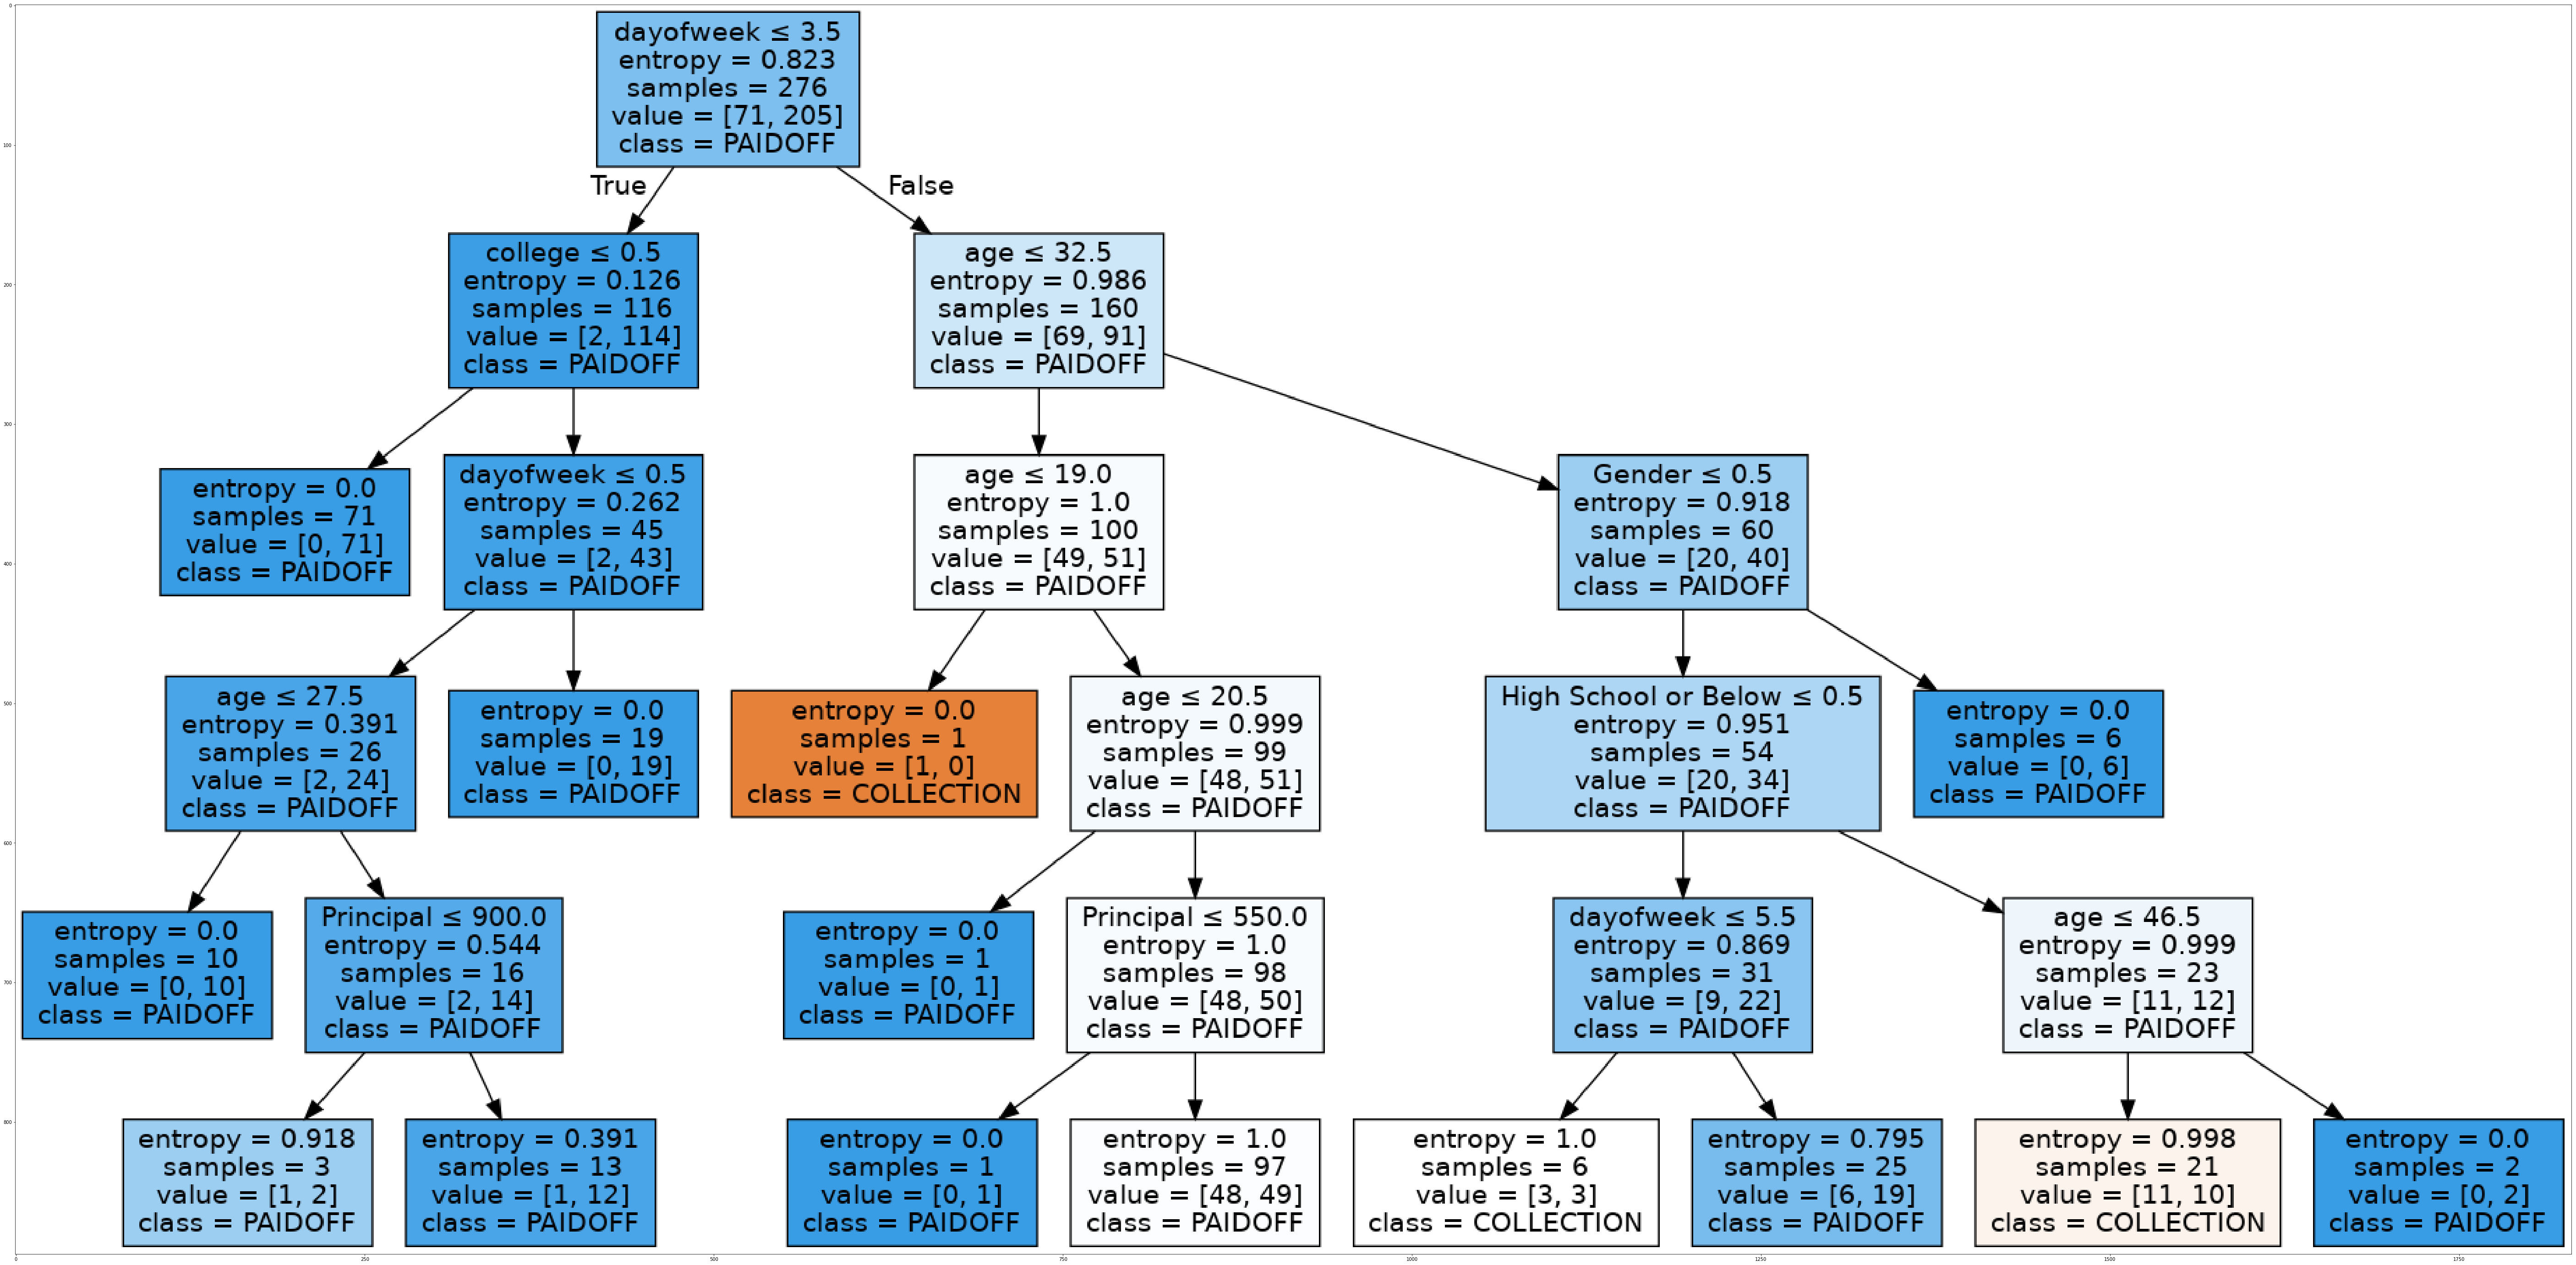

In [26]:
##Visualization
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

#Feature selection the best setting to the model
X = adjust_labels(model_parameters[1][0],Feature)
y = df['loan_status'].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=model_parameters[1][1], random_state=4)
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = model_parameters[1][2])
drugTree
drugTree.fit(X_train,y_train)

dot_data = StringIO()
filename = "drugtree.png"
FeatureNames = columns(model_parameters[1][0],Feature) #Labels
targetNames = df['loan_status'].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=FeatureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Support Vector Machine
Notice: We will find the best __kernel_function__  and the best __test_size__ to build the model with the best accuracy.  

In [27]:
def kernel_function(kernel_type):
    if(kernel_type==0):
        kernel_function_='linear'
    if(kernel_type==1):
        kernel_function_='rbf'
    if(kernel_type==2):
        kernel_function_='sigmoid'
    return kernel_function_

##Import Library
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

kernel_function_label_i=[] #'kernel_function_i' value of model for each label combination
test_size_label_i=[] #Test train used for each label combination
A_test_label_i=[] #Accuracy vector of test for each label combination
F_test_label_i=[] #F-1 Score Accuracy vector of test for each label combination
J_test_label_i=[] #Jaccard Accuracy vector of test for each label combination

runclock=time.time()

##Set Config
test_size_min=0.20 #Initial train_size
test_size_max=0.21 #Final train_size
delta_test_size=0.01 #Delta difference between steps

for m in range(iterations):
    #Feature selection
    X = adjust_labels(set_labels_vector_[m],Feature)
    y = df['loan_status'].values
    steps=int((test_size_max-test_size_min)/delta_test_size)+1
    kernel_function_i=[] #'kernel_function' value of model for each 'test_size' value
    test_size_i=[] #Test train used for i step
    A_test_i=[] #Accuracy vector of test for each test_size value.
    F_test_i=[] #F1-Score Accuracy vector of test for each test_size value.
    J_test_i=[] #Jaccard Accuracy vector of test for each test_size value.
    J=0 #step that maximizes the accuracy of the model
    for j in range(0,steps):
        test_size_=test_size_min+j*delta_test_size
        #TRAIN TEST SPLIT
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=test_size_, random_state=4)
        ###CLASSIFICATION
        ##Parameters
        A_test=[] #Accuracy of train for each k value
        F_test=[] #F1-Score Accuracy of train for each k value
        J_test=[] #Jaccard Accuracy of train for each k value
        timei=time.time() #Initial time
        clock=0 #Clock
        for i in range(3):
            clock = time.time()- timei
            #Training
            clf = svm.SVC(kernel=kernel_function(i))
            ##Train Model and Predict  
            clf.fit(X_train, y_train)
            ##Predicting
            yhat = clf.predict(X_test)
            ##Accuracy evaluation
            accuracy=metrics.accuracy_score(y_test, yhat)
            f1_score_index=f1_score(y_test, yhat, average='weighted')
            jaccard_score_index=jaccard_similarity_score(y_test, yhat)
            A_test.append(accuracy)
            F_test.append(f1_score_index)
            J_test.append(jaccard_score_index)
        kernel_function_=A_test.index(max(A_test))
        kernel_function_i.append(kernel_function_)
        test_size_i.append(test_size_)
        A_test_i.append(A_test[kernel_function_])
        F_test_i.append(F_test[kernel_function_])
        J_test_i.append(J_test[kernel_function_])
    J=A_test_i.index(max(A_test_i))
    test_size_label_i.append(test_size_i[J])
    kernel_function_label_i.append(kernel_function_i[J])
    A_test_label_i.append(A_test_i[J])
    F_test_label_i.append(F_test_i[J])
    J_test_label_i.append(J_test_i[J])
    print("-------------------------------------")
    print("TRAINING MODEL")
    print("<<Status: {0:.2%}>>".format(m/iterations))
    if(len(A_test_label_i)==0):
        print("Max Model Accuracy: 0.0000")
    if(len(A_test_label_i)>0):
        print("Max Model Accuracy: %.4f"%(A_test_label_i[A_test_label_i.index(max(A_test_label_i))]))
    print("Runtime: %.2f minutes"%((time.time()-runclock)/60))
    if(m>0):
        print("Time Remaining: %.2f minutes"%((iterations-m)*(time.time()-runclock)/(60*m)))
    print("\nLabels: ",set_labels_vector_[m])
    print("test_size_i: ",test_size_i[J])
    print("kernel_function_i: ", kernel_function(kernel_function_i[J]))
    print("\nAccuracy i: ", A_test_i[J])
    print("F1 Score i: ", F_test_i[J])
    print("Jaccard Score i: ", J_test_i[J])
H=A_test_label_i.index(max(A_test_label_i))
print("--------------------------------------------------------------------------")
print("OPTIMIZED PARAMETERS")
print("<<Status: {0:.2%}>>".format(1))
print("Max Model Accuracy: %.4f"%(A_test_label_i[H]))
print("Runtime: %.2f minutes"%((time.time()-runclock)/60))
print("\nLabels: ",set_labels_vector_[H])
print("test_size_label_i: ",test_size_label_i[H])
print("kernel_function_label_i: ", kernel_function(kernel_function_label_i[H]))
print("\nAccuracy label i: ", A_test_label_i[H])
print("F1 Score label i: ", F_test_label_i[H])
print("Jaccard Score label i: ", J_test_label_i[H])
#Saving the best setting
model_parameters.append([set_labels_vector_[H],test_size_label_i[H],kernel_function(kernel_function_label_i[H])])

-------------------------------------
TRAINING MODEL
<<Status: 0.00%>>
Max Model Accuracy: 0.7857
Runtime: 0.04 minutes

Labels:  ['Principal', 'terms', 'age', 'Gender', 'dayofweek', 'weekend', 'Bechalor', 'High School or Below', 'college']
test_size_i:  0.2
kernel_function_i:  linear

Accuracy i:  0.7857142857142857
F1 Score i:  0.6914285714285714
Jaccard Score i:  0.7857142857142857
-------------------------------------
TRAINING MODEL
<<Status: 0.20%>>
Max Model Accuracy: 0.7857
Runtime: 0.04 minutes
Time Remaining: 20.91 minutes

Labels:  ['terms', 'age', 'Gender', 'dayofweek', 'weekend', 'Bechalor', 'High School or Below', 'college']
test_size_i:  0.2
kernel_function_i:  linear

Accuracy i:  0.7857142857142857
F1 Score i:  0.6914285714285714
Jaccard Score i:  0.7857142857142857
-------------------------------------
TRAINING MODEL
<<Status: 0.39%>>
Max Model Accuracy: 0.7857
Runtime: 0.08 minutes
Time Remaining: 21.04 minutes

Labels:  ['Principal', 'age', 'Gender', 'dayofweek', 'we

# Logistic Regression
Notice: We will find the best __C Value__, the best __optimizer_function__ and the best __test_size__ to build the model with the best accuracy.  

In [28]:
def optimizer_function(optimizer_type):
    if(optimizer_type==0):
        optimizer_function_='liblinear'
    if(optimizer_type==1):
        optimizer_function_='newton-cg'
    if(optimizer_type==2):
        optimizer_function_='lbfgs'
    if(optimizer_type==3):
        optimizer_function_='sag'
    if(optimizer_type==4):
        optimizer_function_='saga'
    return optimizer_function_

##Import Library
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss
import time
import warnings
warnings.filterwarnings("ignore")

runclock=time.time()
test_size_label_i=[] #Test train used for each label combination
optimizer_function_label_i=[] #'optimizer_function_i' value of model for each label combination
C_test_label_i=[] #'C' value of inverse of regularization strength  for each label combination
A_test_label_i=[] #Accuracy vector of test for each label combination
F_test_label_i=[] #F-1 Score Accuracy vector of test for each label combination
J_test_label_i=[] #Jaccard Accuracy vector of test for each label combination
L_test_label_i=[] #Logloss Accuracy vector of test for each label combination

##Set Config
timep=0.1 #Time of processing to find the best 'C' value for each test_size value.
deepening=3 #Number of additional steps to finish the bucle.
Accuracy=0.99 #Set the desired accuracy
test_size_min=0.20 #Initial train_size
test_size_max=0.21 #Final train_size
delta_test_size=0.01 #Delta difference between steps
Ci=1.0 #C value parameter

for m in range(iterations):
    #Feature selection
    X = adjust_labels(set_labels_vector_[m],Feature)
    y = df['loan_status'].values ##Si no funciona convertir estos datos en numerical
    steps=int((test_size_max-test_size_min)/delta_test_size)+1
    test_size_i=[] #Test train used for i step
    optimizer_function_i=[] #'optimizer_function_i' value of model for each 'test_size' value
    C_test_i=[] #'C' value of model for each 'test_size' value
    A_test_i=[] #Accuracy vector of test for each test_size value.
    F_test_i=[] #F1-Score Accuracy vector of test for each test_size value.
    J_test_i=[] #Jaccard Accuracy vector of test for each test_size value.
    L_test_i=[] #LoggLoss Accuracy vector of test for each test_size value.
    J=0 #step that maximizes the accuracy of the model
    for j in range(0,steps):
        test_size_=test_size_min+j*delta_test_size
        #TRAIN TEST SPLIT
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=test_size_, random_state=4)
        ###CLASSIFICATION
        ##Parameters
        C_test=[] #C Value for each optimizer value
        A_test=[] #Accuracy of train for each optimizer value
        F_test=[] #F1-Score Accuracy of train for each optimizer value
        J_test=[] #Jaccard Accuracy of train for each optimizer value
        L_test=[] #LogLoss Accuracy of train for each optimizer value
        for i in range(5):
            C_=[] #C Value
            A=[] #Accuracy of train for each C value
            F=[] #F1-Score Accuracy of train for each C value
            J=[] #Jaccard Accuracy of train for each C value
            L=[] #LogLoss Accuracy of train for each C value
            g=0
            clock=0 #Clock
            timei=time.time() #Initial time
            while g==0 or g>0 and clock<timep and max(A)<Accuracy and g-A.index(max(A))<deepening:
                g=g+1
                clock = time.time()- timei
                ##Train Model and Predict  
                LR = LogisticRegression(C=Ci/float(g), solver=optimizer_function(i)).fit(X_train,y_train)
                ##Predicting
                yhat = LR.predict(X_test)
                yhat
                ##Probability for each class
                yhat_prob = LR.predict_proba(X_test)
                yhat_prob
                ##Accuracy evaluation
                accuracy=metrics.accuracy_score(y_test, yhat)
                f1_score_index=f1_score(y_test, yhat, average='weighted')
                jaccard_score_index=jaccard_similarity_score(y_test, yhat)
                log_loss_score_index=log_loss(y_test, yhat_prob)
                C_.append(Ci/float(g))
                A.append(accuracy)
                F.append(f1_score_index)
                J.append(jaccard_score_index)
                L.append(log_loss_score_index)
            E=A.index(max(A))
            C_test.append(C_[E])
            A_test.append(A[E])
            F_test.append(F[E])
            J_test.append(J[E])
            L_test.append(L[E])
        optimizer_function_=A_test.index(max(A_test))
        test_size_i.append(test_size_)
        optimizer_function_i.append(optimizer_function_)
        C_test_i.append(C_test[optimizer_function_])
        A_test_i.append(A_test[optimizer_function_])
        F_test_i.append(F_test[optimizer_function_])
        J_test_i.append(J_test[optimizer_function_])
        L_test_i.append(L_test[optimizer_function_])
    J=A_test_i.index(max(A_test_i))
    test_size_label_i.append(test_size_i[J])
    optimizer_function_label_i.append(optimizer_function_i[J])
    C_test_label_i.append(C_test_i[J])
    A_test_label_i.append(A_test_i[J])
    F_test_label_i.append(F_test_i[J])
    J_test_label_i.append(J_test_i[J])
    L_test_label_i.append(L_test_i[J])
    print("-------------------------------------")
    print("TRAINING MODEL")
    print("<<Status: {0:.2%}>>".format(m/iterations))
    if(len(A_test_label_i)==0):
        print("Max Model Accuracy: 0.0000")
    if(len(A_test_label_i)>0):
        print("Max Model Accuracy: %.4f"%(A_test_label_i[A_test_label_i.index(max(A_test_label_i))]))
    print("Runtime: %.2f minutes"%((time.time()-runclock)/60))
    if(m>0):
        print("Time Remaining: %.2f minutes"%((iterations-m)*(time.time()-runclock)/(60*m)))
    print("\nLabels: ",set_labels_vector_[m])
    print("test_size_i: ",test_size_i[J])
    print("optimizer_function_i: ", optimizer_function(optimizer_function_i[J]))
    print("C_test_i: ", C_test_i[J])
    print("\nAccuracy i: ", A_test_i[J])
    print("F1-Score i: ", F_test_i[J])
    print("Jaccard Score i: ", J_test_i[J])
    print("Log-Loss Score i: ", L_test_i[J])
H=A_test_label_i.index(max(A_test_label_i))
print("--------------------------------------------------------------------------")
print("OPTIMIZED PARAMETERS")
print("<<Status: {0:.2%}>>".format(1))
print("Max Model Accuracy: %.4f"%(A_test_label_i[H]))
print("Runtime: %.2f minutes"%((time.time()-runclock)/60))
print("\nLabels: ",set_labels_vector_[H])
print("test_size_label_i: ",test_size_label_i[H])
print("optimizer_function_label_i: ", optimizer_function(optimizer_function_label_i[H]))
print("C_test_label_i: ", C_test_label_i[H])
print("\nAccuracy label i: ", A_test_label_i[H])
print("F1-Score label i: ", F_test_label_i[H])
print("Jaccard Score label i: ", J_test_label_i[H])
print("Log-Loss Score label i: ", L_test_label_i[H])

#Saving the best setting
model_parameters.append([set_labels_vector_[H],test_size_label_i[H],optimizer_function(optimizer_function_label_i[H]),C_test_label_i[H]])


-------------------------------------
TRAINING MODEL
<<Status: 0.00%>>
Max Model Accuracy: 0.7857
Runtime: 0.01 minutes

Labels:  ['Principal', 'terms', 'age', 'Gender', 'dayofweek', 'weekend', 'Bechalor', 'High School or Below', 'college']
test_size_i:  0.2
optimizer_function_i:  sag
C_test_i:  1.0

Accuracy i:  0.7857142857142857
F1-Score i:  0.6914285714285714
Jaccard Score i:  0.7857142857142857
Log-Loss Score i:  0.5326698084530344
-------------------------------------
TRAINING MODEL
<<Status: 0.20%>>
Max Model Accuracy: 0.7857
Runtime: 0.01 minutes
Time Remaining: 4.91 minutes

Labels:  ['terms', 'age', 'Gender', 'dayofweek', 'weekend', 'Bechalor', 'High School or Below', 'college']
test_size_i:  0.2
optimizer_function_i:  newton-cg
C_test_i:  1.0

Accuracy i:  0.7285714285714285
F1-Score i:  0.6953867388649997
Jaccard Score i:  0.7285714285714285
Log-Loss Score i:  0.490441552886604
-------------------------------------
TRAINING MODEL
<<Status: 0.39%>>
Max Model Accuracy: 0.7857

# Model Evaluation using Test set

In [29]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [30]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-09-12 02:09:25--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-09-12 02:09:25 (385 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [31]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [32]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df.head()
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()
#Use one hot encoding technique to conver categorical varables to binary variables
test_Feature = test_df[['Principal','terms','age','Gender','dayofweek','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_Feature.head()

,Principal,terms,age,Gender,dayofweek,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,3,0,1,0,0
1,300,7,35,0,4,1,0,0,0
2,1000,30,43,1,5,1,0,1,0
3,1000,30,26,0,5,1,0,0,1
4,800,15,29,0,6,1,1,0,0


Now, we are going to create one list with each one of Accuracy's Models that we have found for the __new dataset__.

In [33]:
model_accuracy=[]

The accuracy evaluation for the __KNN Model__ using the best parameters found in the training model.

In [34]:
#Feature selection the best setting to the model
X = adjust_labels(model_parameters[0][0],test_Feature)
y = test_df['loan_status'].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=model_parameters[0][1], random_state=4)
##Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = model_parameters[0][2]).fit(X_train,y_train)
neigh
##Predicting
yhat = neigh.predict(X_test)
yhat[0:5]
##Accuracy evaluation
model_accuracy.append([metrics.accuracy_score(y_test, yhat),f1_score(y_test, yhat, average='weighted'),jaccard_similarity_score(y_test, yhat),"NA"])

The accuracy evaluation for the __Decision Tree Model__ using the best parameters found in the training model.

In [35]:
#Feature selection the best setting to the model
X = adjust_labels(model_parameters[1][0],test_Feature)
y = test_df['loan_status'].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=model_parameters[1][1], random_state=4)
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = model_parameters[1][2])
drugTree
drugTree.fit(X_train,y_train)
yhat = drugTree.predict(X_test)
yhat[0:5]
##Accuracy evaluation
model_accuracy.append([metrics.accuracy_score(y_test, yhat),f1_score(y_test, yhat, average='weighted'),jaccard_similarity_score(y_test, yhat),"NA"])

The accuracy evaluation for the __Support Vector Machine Model__ using the best parameters found in the training model.

In [36]:
X = adjust_labels(model_parameters[2][0],test_Feature)
y = test_df['loan_status'].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=model_parameters[2][1], random_state=4)
#Training
clf = svm.SVC(kernel=model_parameters[2][2])
##Train Model and Predict  
clf.fit(X_train, y_train)
##Predicting
yhat = clf.predict(X_test)
##Accuracy evaluation
model_accuracy.append([metrics.accuracy_score(y_test, yhat),f1_score(y_test, yhat, average='weighted'),jaccard_similarity_score(y_test, yhat),"NA"])

The accuracy evaluation for the __Logistic Regression Model__ using the best parameters found in the training model.

In [37]:
X = adjust_labels(model_parameters[3][0],test_Feature)
y = test_df['loan_status'].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=model_parameters[3][1], random_state=4)
##Train Model and Predict  
LR = LogisticRegression(C=model_parameters[3][3], solver=model_parameters[3][2]).fit(X_train,y_train)
LR
##Predicting
yhat = LR.predict(X_test)
yhat[0:5]
##Probability for each class
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:5]
##Accuracy evaluation
model_accuracy.append([metrics.accuracy_score(y_test, yhat),f1_score(y_test, yhat, average='weighted'),jaccard_similarity_score(y_test, yhat),log_loss(y_test, yhat_prob)])


# Report
We should be able to report the accuracy of the built model using different evaluation metrics:

In [38]:
#Creating the Repor the accuracy of the built model using different evaluation metrics.
Score=[]
Jaccard=[]
F1_score=[]
LogLoss=[]
for i in range(4):
    Score.append(model_accuracy[i][0])
    Jaccard.append(model_accuracy[i][2])
    F1_score.append(model_accuracy[i][1])
    LogLoss.append(model_accuracy[i][3])
report=pd.DataFrame(["KNN","Decision Tree","SVM","LogisticRegression"])
report.columns=['Algorithm']
report['Score']=Score
report['F1-score']=F1_score
report['Jaccard']=Jaccard
report['LogLoss']=LogLoss
report.head()

,Algorithm,Score,F1-score,Jaccard,LogLoss
0,KNN,0.636364,0.707071,0.636364,NA
1,Decision Tree,0.545455,0.632035,0.545455,NA
2,SVM,0.636364,0.707071,0.636364,NA
3,LogisticRegression,0.909091,0.865801,0.909091,0.416199
